In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import math
import quandl

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [12]:
dados_acoes = pd.read_csv("dados/acoes_yahoo/dados_acoes.csv").set_index("Date")
dados_acoes = dados_acoes["2018-01-01":].fillna(method="ffill")
dados_acoes.head()

,ABEV3,B3SA3,BBDC4,BOVA11,BRML3,CIEL3,CMIG4,COGN3,CSNA3,EQTL3,GGBR4,IRBR3,ITSA4,ITUB4,MGLU3,PETR4,PRIO3,USIM5,VALE3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,19.844748,6.783468,20.424826,75.099998,11.446580,19.797764,4.820838,17.506113,7.107370,12.082548,12.042627,9.752999,8.226566,25.130365,2.390916,14.853566,1.7090,9.255544,35.182281,7.698611
2018-01-03,19.890491,6.898942,20.517693,75.300003,11.409657,20.077188,4.779278,17.658833,7.369393,12.106448,12.024054,9.752999,8.323527,25.302181,2.360765,14.988194,1.7400,9.564064,34.971458,7.738552
2018-01-04,19.780704,6.943357,20.854338,76.000000,11.548123,20.093620,4.723866,17.897469,7.598663,11.970173,12.674003,9.836902,8.480149,25.829071,2.417448,15.015120,1.8002,10.103968,35.114811,7.798464
2018-01-05,19.853895,7.044030,20.972456,76.440002,11.585049,20.323736,4.730793,17.859287,7.770616,12.088034,12.516158,9.964203,8.495069,25.903526,2.369811,15.104866,1.9016,9.670115,35.662952,7.548833
2018-01-08,19.817299,7.076598,20.966564,76.760002,11.538891,20.545630,4.744646,17.067026,8.147273,12.246408,12.952554,10.126223,8.487609,25.817610,2.370112,15.284368,2.0456,9.776170,36.455658,7.678641


In [13]:
dados_cripto = pd.read_csv("dados/criptos_yahoo/dados_criptos.csv").set_index("Date")
dados_cripto = dados_cripto["2018-01-01":].fillna(method="ffill")
dados_cripto.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,GAS-USD,LINK-USD,LTC-USD,REP-USD,TRX-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,
2018-01-01,0.728657,2432.540039,8.41461,13657.200195,0.008909,8.84318,34.167900,772.640991,31.443199,0.733563,229.033005,74.476196,0.051695,0.480008,358.989990,2.39103
2018-01-02,0.782587,2711.000000,8.83777,14982.099609,0.009145,9.33471,34.917099,884.443970,32.714401,0.673712,255.684006,79.471703,0.078682,0.564766,383.416992,2.48090
2018-01-03,1.079660,2608.689941,9.53588,15201.000000,0.009320,10.22790,34.863400,962.719971,39.192699,0.681167,245.367996,77.466003,0.094703,0.896227,412.062988,3.10537
2018-01-04,1.114120,2430.179932,9.21399,15599.200195,0.009644,11.27550,36.318001,980.921997,43.164501,0.984368,241.369995,73.698502,0.207974,0.724050,403.048004,3.19663
2018-01-05,0.999559,2584.479980,14.91720,17429.500000,0.012167,10.83960,36.199501,997.719971,47.003101,0.907486,249.270996,72.808701,0.220555,0.662712,384.936005,3.04871


In [14]:
dados = dados_acoes.join(dados_cripto).dropna()
dados.head()

,ABEV3,B3SA3,BBDC4,BOVA11,BRML3,CIEL3,CMIG4,COGN3,CSNA3,EQTL3,...,ETC-USD,ETH-USD,GAS-USD,LINK-USD,LTC-USD,REP-USD,TRX-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,19.844748,6.783468,20.424826,75.099998,11.446580,19.797764,4.820838,17.506113,7.107370,12.082548,...,34.917099,884.443970,32.714401,0.673712,255.684006,79.471703,0.078682,0.564766,383.416992,2.48090
2018-01-03,19.890491,6.898942,20.517693,75.300003,11.409657,20.077188,4.779278,17.658833,7.369393,12.106448,...,34.863400,962.719971,39.192699,0.681167,245.367996,77.466003,0.094703,0.896227,412.062988,3.10537
2018-01-04,19.780704,6.943357,20.854338,76.000000,11.548123,20.093620,4.723866,17.897469,7.598663,11.970173,...,36.318001,980.921997,43.164501,0.984368,241.369995,73.698502,0.207974,0.724050,403.048004,3.19663
2018-01-05,19.853895,7.044030,20.972456,76.440002,11.585049,20.323736,4.730793,17.859287,7.770616,12.088034,...,36.199501,997.719971,47.003101,0.907486,249.270996,72.808701,0.220555,0.662712,384.936005,3.04871
2018-01-08,19.817299,7.076598,20.966564,76.760002,11.538891,20.545630,4.744646,17.067026,8.147273,12.246408,...,34.186298,1148.530029,48.830200,1.377300,255.763000,98.124802,0.151993,0.629323,405.074005,2.45621


In [15]:
retornos_acoes = dados_acoes.pct_change().dropna()
retornos_cripto = dados_cripto.pct_change().dropna()

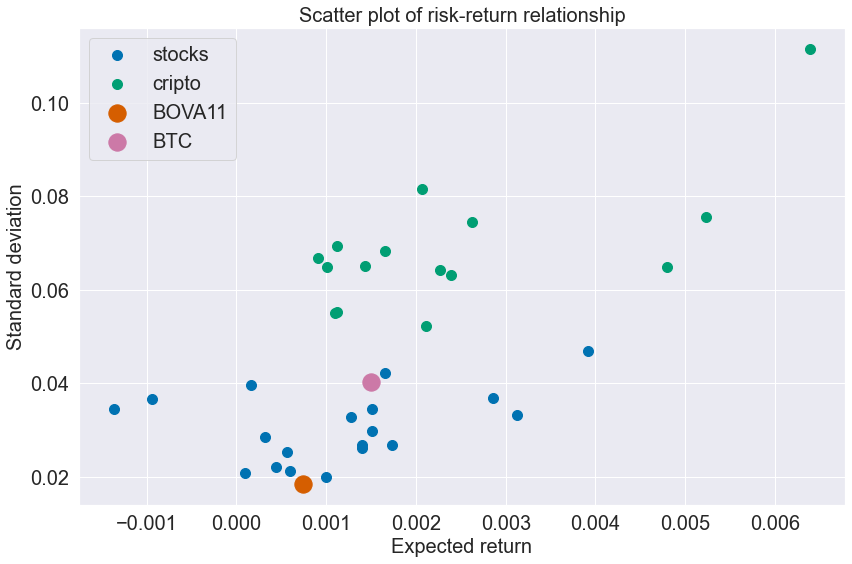

In [16]:
plt.scatter(retornos_acoes.mean(), retornos_acoes.std(), s=100)
plt.scatter(retornos_cripto.mean(), retornos_cripto.std(), s=100)
plt.scatter(retornos_acoes.mean()['BOVA11'], retornos_acoes.std()['BOVA11'], s=300)
plt.scatter(retornos_cripto.mean()['BTC-USD'], retornos_cripto.std()['BTC-USD'], s=300)
plt.xlabel("Expected return")
plt.ylabel("Standard deviation")
plt.title("Scatter plot of risk-return relationship")
plt.legend(["stocks", "cripto", "BOVA11", "BTC"])
plt.tight_layout()
plt.savefig("graficos/scatter_plot_2018.png")

In [17]:
N = 252 # 252 trading days in a year
rf = 0.025 # 3.75% risk free rate

In [18]:
def sharpe_ratio(data, N, rf):
    returns = data.pct_change().dropna()
    mean = returns.mean() - (math.pow(1+rf, 1/N)-1)
    sigma = returns.std()
    return mean / sigma

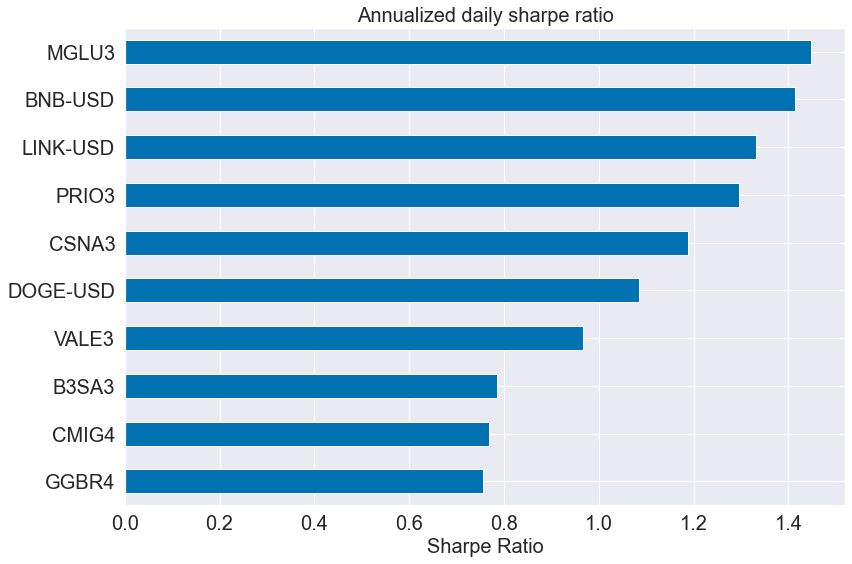

In [19]:
sharpes = dados.apply(sharpe_ratio, args = (N, rf, ), axis = 0)
(sharpes.sort_values()[-10:] * math.sqrt(N)).plot.barh()
plt.xlabel('Sharpe Ratio')
plt.title("Annualized daily sharpe ratio")
plt.tight_layout()
plt.savefig("graficos/sharpes_2018.png")

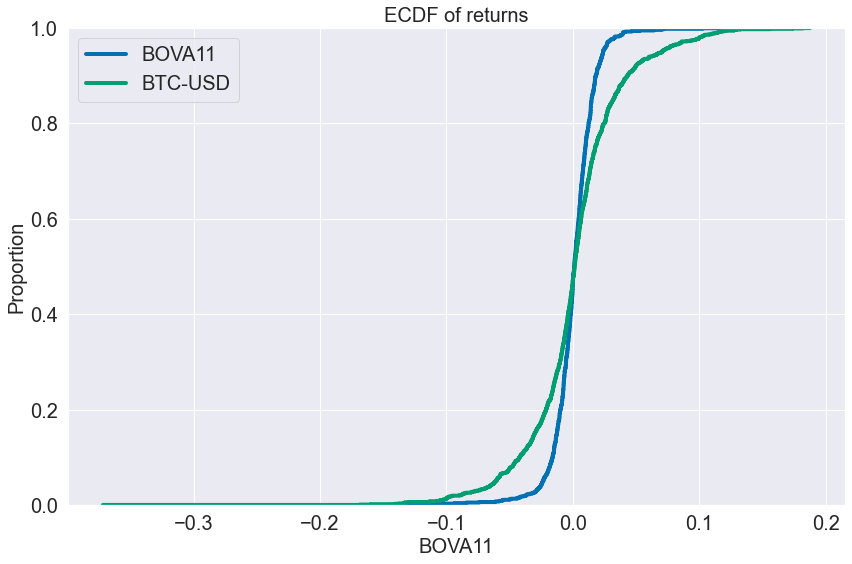

In [20]:
sns.ecdfplot(retornos_acoes['BOVA11'])
sns.ecdfplot(retornos_cripto['BTC-USD'])
plt.legend(labels=["BOVA11", "BTC-USD"])
plt.title("ECDF of returns")
plt.tight_layout()
plt.savefig("graficos/ecdf_2018.png")